In [1]:
import pandas as pd
from pathlib import Path

# ---------- CONFIG ----------
BASE = "https://raw.githubusercontent.com/DieckmannDaniel/Git_energy_model/refs/heads/main/model_output"

# known files and separators
FILES = {
    "cost_breakdown.csv": "\t",
    "end_use.csv": "\t",
    "energy_output.csv": "\t",
    "gwp_breakdown.csv": "\t",
    "installed_technologies.csv": "\t",
    "losses.csv": "\t",
    "monthly_operation.csv": "\t",
    "performance.csv": "\t",
    "shares.csv": "\t",
    "storage.csv": "\t",
    "sankey/input2sankey.csv": ",",  # comma-separated, subfolder
}

def download_run_data(run_name: str, base: str = BASE) -> dict:
    """
    Downloads all model CSVs for a given run name into pandas DataFrames.
    Returns a dict like:
    {
        'TOTEX_min_baseline_cost_breakdown': DataFrame,
        'TOTEX_min_baseline_end_use': DataFrame,
        ...
    }
    """
    dfs = {}
    for rel_path, sep in FILES.items():
        url = f"{base.rstrip('/')}/{run_name}/{rel_path}"
        key = f"{run_name}_{Path(rel_path).stem}"  # e.g. TOTEX_min_baseline_cost_breakdown
        try:
            df = pd.read_csv(url, sep=sep, header=0)
            dfs[key] = df
            print(f"✅ Loaded: {key}")
        except Exception as e:
            print(f"[WARN] Could not load {url}: {e}")
    return dfs


In [2]:
# ---------- USAGE ----------
if __name__ == "__main__":
    runs = [
        "TOTEX_min_baseline",
        "GWP_min_baseline_results",
        "Task4_totex_i_1_results",
        "Task4_totex_i_2_results",
        "Task4_totex_i_3_results",
        "Task4_totex_i_4_results",
        "Task4_totex_i_5_results",
        "Task4_totex_i_6_results",
        "Task4_gwp_i_1_results",
        "Task4_gwp_i_2_results",
        "Task4_gwp_i_3_results",
        "Task4_gwp_i_4_results",
        "Task4_gwp_i_5_results",
        "Task4_gwp_i_6_results"
    ]

    all_data = {}
    for run in runs:
        all_data.update(download_run_data(run))

    # Example access:
    TOTEX_min_baseline_cost_breakdown = all_data["TOTEX_min_baseline_cost_breakdown"]
    display(TOTEX_min_baseline_cost_breakdown.head())

✅ Loaded: TOTEX_min_baseline_cost_breakdown
✅ Loaded: TOTEX_min_baseline_end_use
✅ Loaded: TOTEX_min_baseline_energy_output
✅ Loaded: TOTEX_min_baseline_gwp_breakdown
✅ Loaded: TOTEX_min_baseline_installed_technologies
✅ Loaded: TOTEX_min_baseline_losses
✅ Loaded: TOTEX_min_baseline_monthly_operation
✅ Loaded: TOTEX_min_baseline_performance
✅ Loaded: TOTEX_min_baseline_shares
✅ Loaded: TOTEX_min_baseline_storage
✅ Loaded: TOTEX_min_baseline_input2sankey
✅ Loaded: GWP_min_baseline_results_cost_breakdown
✅ Loaded: GWP_min_baseline_results_end_use
✅ Loaded: GWP_min_baseline_results_energy_output
✅ Loaded: GWP_min_baseline_results_gwp_breakdown
✅ Loaded: GWP_min_baseline_results_installed_technologies
✅ Loaded: GWP_min_baseline_results_losses
✅ Loaded: GWP_min_baseline_results_monthly_operation
✅ Loaded: GWP_min_baseline_results_performance
✅ Loaded: GWP_min_baseline_results_shares
✅ Loaded: GWP_min_baseline_results_storage
✅ Loaded: GWP_min_baseline_results_input2sankey
✅ Loaded: Task4_to

,Technology,C_inv [MCHF/y],C_maint [MCHF/y]
0,CCGT,88.985174,38.744015
1,PV,299.577580,250.771200
2,WIND,743.561476,169.460000
3,HYDRO_DAM,1905.444566,35.780227
4,HYDRO_RIVER,1140.409501,328.295917


In [3]:
TOTEX_min_baseline_performance = all_data["TOTEX_min_baseline_performance"]
TOTEX_min_baseline_performance

,Indicator,Value [MCHF/y]
0,CAPEX,10663.18
1,OPEX,5248.96
2,TOTEX,15912.14
3,Indicator,Value [ktCO2-eq/y]
4,GWP_construction,1768.57
5,GWP_op,40739.01
6,GWP_total,42507.58


In [4]:
GWP_min_baseline_results_performance = all_data["GWP_min_baseline_results_performance"]
GWP_min_baseline_results_performance

,Indicator,Value [MCHF/y]
0,CAPEX,17026.55
1,OPEX,7768.27
2,TOTEX,24794.81
3,Indicator,Value [ktCO2-eq/y]
4,GWP_construction,2049.20
5,GWP_op,9134.35
6,GWP_total,11183.56


In [5]:
# Extract TOTEX value from TOTEX_min_baseline_performance
TOTEX_min_baseline_totex = TOTEX_min_baseline_performance[
    TOTEX_min_baseline_performance['Indicator'] == 'TOTEX'
]['Value [MCHF/y]'].iloc[0]
TOTEX_min_baseline_totex = float(TOTEX_min_baseline_totex)

# Extract TOTEX value from GWP_min_baseline_results_performance
GWP_min_baseline_results_totex = GWP_min_baseline_results_performance[
    GWP_min_baseline_results_performance['Indicator'] == 'TOTEX'
]['Value [MCHF/y]'].iloc[0]
GWP_min_baseline_results_totex = float(GWP_min_baseline_results_totex)

print(f"TOTEX from TOTEX_min_baseline_performance: {TOTEX_min_baseline_totex}")
print(f"TOTEX from GWP_min_baseline_results_performance: {GWP_min_baseline_results_totex}")

TOTEX from TOTEX_min_baseline_performance: 15912.14
TOTEX from GWP_min_baseline_results_performance: 24794.81


In [6]:
totex_constraints = []
for i in range(1, 7):
  constraint_value = GWP_min_baseline_results_totex - (i/7) * (GWP_min_baseline_results_totex - TOTEX_min_baseline_totex)
  totex_constraints.append(constraint_value)
  print(f"Run {i}: {constraint_value}")

Run 1: 23525.857142857145
Run 2: 22256.904285714285
Run 3: 20987.95142857143
Run 4: 19718.998571428572
Run 5: 18450.045714285712
Run 6: 17181.09285714286


In [7]:
# Extract GWP_total value from TOTEX_min_baseline_performance
TOTEX_min_baseline_GWP_total = TOTEX_min_baseline_performance[
    TOTEX_min_baseline_performance['Indicator'] == 'GWP_total'
]['Value [MCHF/y]'].iloc[0]
TOTEX_min_baseline_GWP_total = float(TOTEX_min_baseline_GWP_total)

# Extract GWP_total value from GWP_min_baseline_results_performance
GWP_min_baseline_results_GWP_total = GWP_min_baseline_results_performance[
    GWP_min_baseline_results_performance['Indicator'] == 'GWP_total'
]['Value [MCHF/y]'].iloc[0]
GWP_min_baseline_results_GWP_total = float(GWP_min_baseline_results_GWP_total)

print(f"GWP_total from TOTEX_min_baseline_performance: {TOTEX_min_baseline_GWP_total}")
print(f"GWP_total from GWP_min_baseline_results_performance: {GWP_min_baseline_results_GWP_total}")

GWP_total from TOTEX_min_baseline_performance: 42507.58
GWP_total from GWP_min_baseline_results_performance: 11183.56


In [8]:
gwp_constraints = []
for i in range(1, 7):
  constraint_value_gwp = TOTEX_min_baseline_GWP_total - (i/7) * (TOTEX_min_baseline_GWP_total - GWP_min_baseline_results_GWP_total)
  gwp_constraints.append(constraint_value_gwp)
  print(f"Run {i}: {constraint_value_gwp}")

Run 1: 38032.72
Run 2: 33557.86
Run 3: 29083.0
Run 4: 24608.14
Run 5: 20133.28
Run 6: 15658.419999999998


In [9]:
Task4_totex_i_1_results_performance = all_data["Task4_totex_i_1_results_performance"]
Task4_totex_i_2_results_performance = all_data["Task4_totex_i_2_results_performance"]
Task4_totex_i_3_results_performance = all_data["Task4_totex_i_3_results_performance"]
Task4_totex_i_4_results_performance = all_data["Task4_totex_i_4_results_performance"]
Task4_totex_i_5_results_performance = all_data["Task4_totex_i_5_results_performance"]
Task4_totex_i_6_results_performance = all_data["Task4_totex_i_6_results_performance"]
Task4_gwp_i_1_results_performance = all_data["Task4_gwp_i_1_results_performance"]
Task4_gwp_i_2_results_performance = all_data["Task4_gwp_i_2_results_performance"]
Task4_gwp_i_3_results_performance = all_data["Task4_gwp_i_3_results_performance"]
Task4_gwp_i_4_results_performance = all_data["Task4_gwp_i_4_results_performance"]
Task4_gwp_i_5_results_performance = all_data["Task4_gwp_i_5_results_performance"]
Task4_gwp_i_6_results_performance = all_data["Task4_gwp_i_6_results_performance"]

In [10]:
Task4_totex_i_1_results_performance

,Indicator,Value [MCHF/y]
0,CAPEX,10813.39
1,OPEX,5125.90
2,TOTEX,15939.29
3,Indicator,Value [ktCO2-eq/y]
4,GWP_construction,1799.52
5,GWP_op,36233.20
6,GWP_total,38032.72


In [11]:
task4_performance_summary = {}

task4_runs = [
    "Task4_totex_i_1_results",
    "Task4_totex_i_2_results",
    "Task4_totex_i_3_results",
    "Task4_totex_i_4_results",
    "Task4_totex_i_5_results",
    "Task4_totex_i_6_results",
    "Task4_gwp_i_1_results",
    "Task4_gwp_i_2_results",
    "Task4_gwp_i_3_results",
    "Task4_gwp_i_4_results",
    "Task4_gwp_i_5_results",
    "Task4_gwp_i_6_results"
]

for run_name in task4_runs:
    performance_df_name = f"{run_name}_performance"
    if performance_df_name in locals(): # Check if the variable exists
        performance_df = locals()[performance_df_name]
        try:
            # Extract TOTEX
            totex_row = performance_df[performance_df['Indicator'] == 'TOTEX']
            totex = float(totex_row['Value [MCHF/y]'].iloc[0])

            # Extract GWP_total
            gwp_row = performance_df[performance_df['Indicator'] == 'GWP_total']
            gwp_total = float(gwp_row['Value [MCHF/y]'].iloc[0]) # is Value [ktCO2-eq/y] but not the way the table is formatted

            task4_performance_summary[run_name] = {'TOTEX': totex, 'GWP_total': gwp_total}

        except Exception as e:
            print(f"[WARN] Could not extract data for {run_name}: {e}")
    else:
        print(f"[WARN] Dataframe variable not found for: {performance_df_name}")


for run_name, data in task4_performance_summary.items():
    print(f"{run_name}: TOTEX = {data['TOTEX']}, GWP_total = {data['GWP_total']}")

Task4_totex_i_1_results: TOTEX = 15939.29, GWP_total = 38032.72
Task4_totex_i_2_results: TOTEX = 16054.81, GWP_total = 33557.86
Task4_totex_i_3_results: TOTEX = 16209.74, GWP_total = 29083.0
Task4_totex_i_4_results: TOTEX = 16621.52, GWP_total = 24608.14
Task4_totex_i_5_results: TOTEX = 17594.4, GWP_total = 20133.28
Task4_totex_i_6_results: TOTEX = 19448.12, GWP_total = 15658.42
Task4_gwp_i_1_results: TOTEX = 23525.86, GWP_total = 11316.23
Task4_gwp_i_2_results: TOTEX = 22256.9, GWP_total = 11626.3
Task4_gwp_i_3_results: TOTEX = 20987.95, GWP_total = 13003.92
Task4_gwp_i_4_results: TOTEX = 19719.0, GWP_total = 15165.48
Task4_gwp_i_5_results: TOTEX = 18450.05, GWP_total = 17499.71
Task4_gwp_i_6_results: TOTEX = 17181.09, GWP_total = 21754.44


In [12]:
task4_performance_summary

{'Task4_totex_i_1_results': {'TOTEX': 15939.29, 'GWP_total': 38032.72},
 'Task4_totex_i_2_results': {'TOTEX': 16054.81, 'GWP_total': 33557.86},
 'Task4_totex_i_3_results': {'TOTEX': 16209.74, 'GWP_total': 29083.0},
 'Task4_totex_i_4_results': {'TOTEX': 16621.52, 'GWP_total': 24608.14},
 'Task4_totex_i_5_results': {'TOTEX': 17594.4, 'GWP_total': 20133.28},
 'Task4_totex_i_6_results': {'TOTEX': 19448.12, 'GWP_total': 15658.42},
 'Task4_gwp_i_1_results': {'TOTEX': 23525.86, 'GWP_total': 11316.23},
 'Task4_gwp_i_2_results': {'TOTEX': 22256.9, 'GWP_total': 11626.3},
 'Task4_gwp_i_3_results': {'TOTEX': 20987.95, 'GWP_total': 13003.92},
 'Task4_gwp_i_4_results': {'TOTEX': 19719.0, 'GWP_total': 15165.48},
 'Task4_gwp_i_5_results': {'TOTEX': 18450.05, 'GWP_total': 17499.71},
 'Task4_gwp_i_6_results': {'TOTEX': 17181.09, 'GWP_total': 21754.44}}

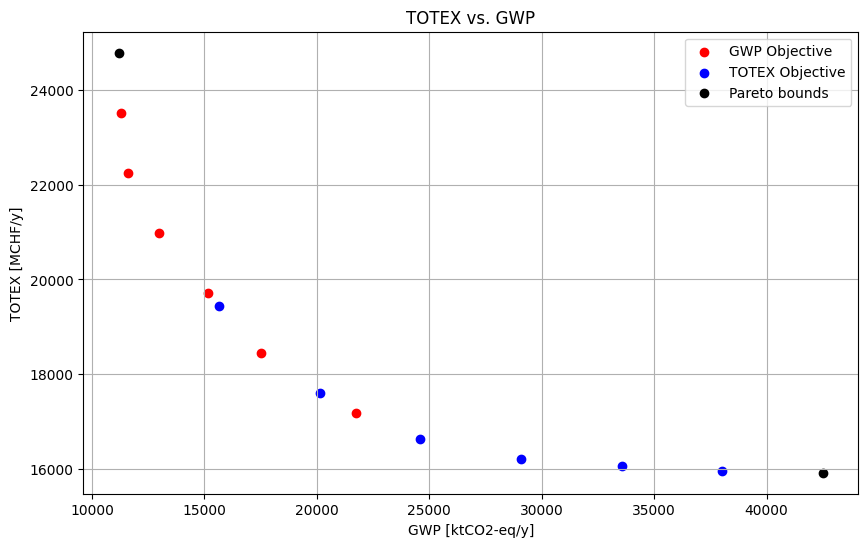

In [14]:
import matplotlib.pyplot as plt

# Extract data for plotting
gwp_x = [data['GWP_total'] for run_name, data in task4_performance_summary.items() if 'Task4_gwp_i' in run_name]
gwp_y = [data['TOTEX'] for run_name, data in task4_performance_summary.items() if 'Task4_gwp_i' in run_name]

totex_x = [data['GWP_total'] for run_name, data in task4_performance_summary.items() if 'Task4_totex_i' in run_name]
totex_y = [data['TOTEX'] for run_name, data in task4_performance_summary.items() if 'Task4_totex_i' in run_name]

# Pareto bounds
pareto_x = [GWP_min_baseline_results_GWP_total, TOTEX_min_baseline_GWP_total]
pareto_y = [GWP_min_baseline_results_totex, TOTEX_min_baseline_totex]


# Create the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(gwp_x, gwp_y, color='red', label='GWP Objective')
plt.scatter(totex_x, totex_y, color='blue', label='TOTEX Objective')
plt.scatter(pareto_x, pareto_y, color='black', label='Pareto bounds')


# Add labels and title
plt.xlabel('GWP [ktCO2-eq/y]')
plt.ylabel('TOTEX [MCHF/y]')
plt.title('TOTEX vs. GWP')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()